# <u>BCG X PROJECT</u>  
## OBJECTIVE:  
Develop A Random Forest Classificer To Predict User Churn

### IMPORTING PACKAGES

In [1]:
#For Data Manipulation
import pandas as pd
import numpy as np

#For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#For Predictive Modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
#Importing data base
df = pd.read_csv("5.0 customer_data.csv") 

#EDA
#Primary EDA
print("DATA EXPLORATION \nDataset Shape: {} \nDataset Size: {} \n\nDATA SUMMARY".
      format(df.shape, df.size))
df.info()

#Generating count pre and post drop of missing values 
print('\nPre-Drop Count Of Missing Values\n{}'.
      format(df.isna().sum()))
df.dropna(inplace=True, axis=0)
print('\nPost-Drop Count Of Missing Values\n{}'.
      format(df.isna().sum()))

#Generating preview of dataset
print('\nDATASET PREVIEW')
df.head(5)

DATA EXPLORATION 
Dataset Shape: (14606, 63) 
Dataset Size: 920178 

DATA SUMMARY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 63 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          14606 non-null  object 
 1   cons_12m                                    14606 non-null  float64
 2   cons_gas_12m                                14606 non-null  float64
 3   cons_last_month                             14606 non-null  float64
 4   forecast_cons_12m                           14606 non-null  float64
 5   forecast_discount_energy                    14606 non-null  int64  
 6   forecast_meter_rent_12m                     14606 non-null  float64
 7   forecast_price_energy_off_peak              14606 non-null  float64
 8   forecast_price_energy_peak                  14606 non-null  float64
 9   f

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


### MODEL PREP

In [3]:
#Defining X and y variables
y = df.churn
X = df.drop(columns=['id', 'churn'], axis=1)

#Generating train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

#Generating dataframe for split
split = pd.DataFrame(data={"Dimensions":[X_train.shape,
                                         X_test.shape, 
                                         y_train.size, 
                                         y_test.size]},
                    index=["X Train", "X Test", "Y Train" ,"Y Test"])

#Previewing split
split

,Dimensions
X Train,"(10954, 61)"
X Test,"(3652, 61)"
Y Train,10954
Y Test,3652


### INITIALIZING CLASSIFIER

In [4]:
#Defining and Fitting Model
clf = RandomForestClassifier().fit(X_train,y_train)

#Generating Predictions
y_pred = clf.predict(X_test)

### RESULTS

In [5]:
#Generating dataframe for results
results = pd.DataFrame(data={"Accuracy":f"{round((accuracy_score(y_test, y_pred)*100),0)} %",
                            "Precision":f"{round((precision_score(y_test, y_pred)*100),0)} %",
                            "Recall":f"{round((recall_score(y_test, y_pred)*100),0)} %",
                            "F1 Score":f"{round((f1_score(y_test, y_pred)*100),0)} %",
                            "ROC AUC":f"{round((roc_auc_score(y_test, y_pred)*100),0)} %"}, 
                       index=["Random Forest Classifier"])

#Previewing results
results

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Random Forest Classifier,90.0 %,83.0 %,5.0 %,10.0 %,53.0 %


### CONFUSION MATRIX

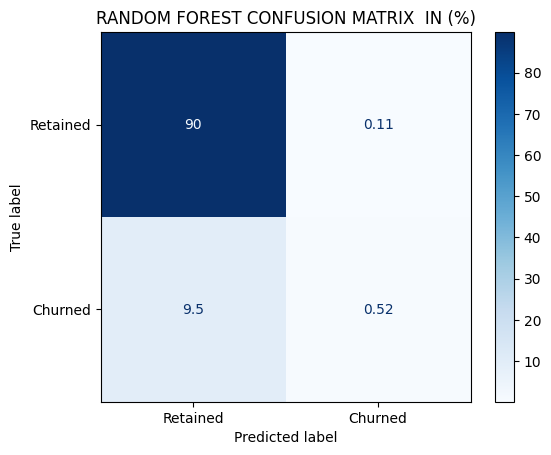

In [6]:
#Displaying confusion matrix
ConfusionMatrixDisplay(confusion_matrix=
                       confusion_matrix(y_test, y_pred, normalize="all")*100,
                       display_labels=['Retained','Churned']).plot(cmap='Blues')
plt.title('RANDOM FOREST CONFUSION MATRIX  IN (%)')
plt.show()

### FEATURE IMPORTANCE

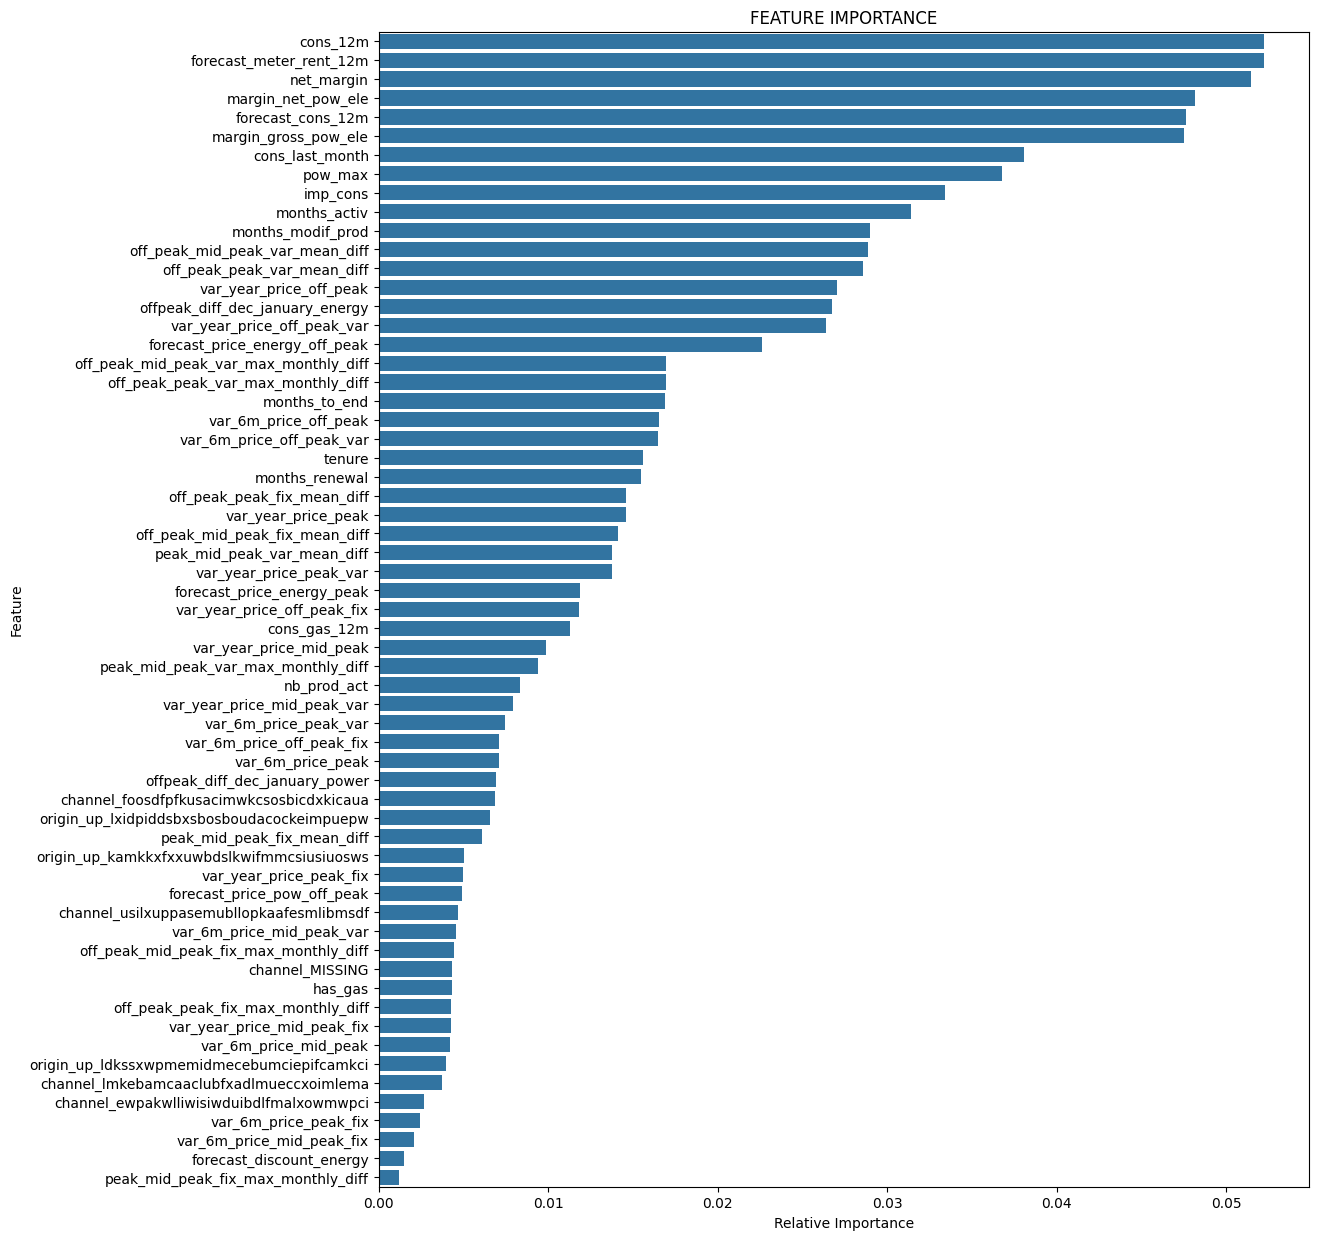

In [7]:
#Generating Feature Importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

#Generating Importances Dataframe
importances_df = pd.DataFrame({
    'Feature':[X.columns[i] for i in indices],
    'Importances':importances[indices]})

#Displaying Feature Importances
plt.figure(figsize=(12,15))
sns.barplot(x='Importances', y='Feature', data=importances_df)
plt.title('FEATURE IMPORTANCE')
plt.xlabel('Relative Importance')
plt.show()